<a href="https://colab.research.google.com/github/Danielius162/Molekulines_kursas/blob/main/Nam%C5%B3%20darbai/Homework3%20(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python for Data Analysis, GMC, Vilnius University, 2025

# HW3: Exploratory Data Analysis (EDA)

- **Tasks in this homework are built around this file:** https://github.com/Tallivm/vu-python/raw/refs/heads/main/plantdata.npy. Download it beforehand and put into the same folder as your Notebook.
- You will need to import these packages: `numpy`, `pandas`, `matplotlib`, `urllib`, `json`. You are also allowed to import `tqdm` and `itertools`. Do not import any other packages.
- **You will need to upload your solutions into your Github repository** dedicated for the Python for Data Analysis course. Either make it public, or keep private but add Taisija as a collaborator (nickname: Tallivm).
- Write at least one custom function somewhere, but it is not required to put everything into functions. Do not write docstrings (function description comments).
- Keep prints informative.
- Do not create classes (you shouldn't know yet what are those).
- Do not change assert statements.

There are 5 tasks in this Notebook. They have slightly different numbers of points between them, with subpoints shown for each subtask e.g. (0.2p). You need to collect 8 points in total to get the maximum grade.

As previously, each task consists of a text cell with task description, a code cell to solve the task, and a code cell with `assert` statements to check your code for *some* possible errors.

Don't hesitate to contact me or Martynas if you are stuck.

In [1]:
# your imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import json
from tqdm import tqdm
import itertools

# 🔃 Task 1 (1 point): Load and examine the data

There is a lab called SNAILAB which studies various snails and their secretion as a cosmetic and pharmaceutical ingredient. SNAILAB researchers know that properties of snail secretion depend on what snails ate in last days. As snails aren't very fast animals, they tend to sit on plants they eat, meaning researchers can take plant samples directly under snails to research their diets.

The "plantdata.npy" file is a Numpy array containing some of those measurements.
- (0.1p) Load it into this Notebook as `raw_data`.
- (0.1p) Print out the shape and type of data.
- (0.4p) Calculate and save the total number of missing values as `n_missing`. Print out the ratio of total missing values in data.
- (0.4p) For each **numeric** data column, print out the minimum, average, median, and maximum values. Ignore missing values.

*Do not use Pandas for Task 1.*

In [2]:

failo_pavadinimas = "plantdata.npy"

try:
    raw_data = np.load(failo_pavadinimas)
    failas_ikeltas = True
    print(f"Sėkmingai įkeltas failas: {failo_pavadinimas}")
    print(f"Duomenų forma (shape): {raw_data.shape}")
    print(f"Duomenų tipas (dtype): {raw_data.dtype}")

except FileNotFoundError:
    print(f"Klaida: Nepavyko rasti failo '{failo_pavadinimas}'.")
    failas_ikeltas = False

if failas_ikeltas:
    n_missing = 0
    for reiksme in raw_data.flat:
        if reiksme is None:
            n_missing += 1
        elif isinstance(reiksme, float) and np.isnan(reiksme):
            n_missing += 1

    total_elements = raw_data.size
    missing_ratio = n_missing / total_elements

    print(f"\nBendras trūkstamų reikšmių skaičius (n_missing): {n_missing}")
    print(f"Trūkstamų reikšmių santykis: {missing_ratio:.4f}")

    def spausdinti_statistika(stulpelis_np, col_idx):
        min_val = np.nanmin(stulpelis_np)
        avg_val = np.nanmean(stulpelis_np)
        med_val = np.nanmedian(stulpelis_np)
        max_val = np.nanmax(stulpelis_np)

        if not np.isnan(min_val):
            print(f"\nStulpelis {col_idx}:")
            print(f"  Min: {min_val:.4f}")
            print(f"  Vidurkis: {avg_val:.4f}")
            print(f"  Mediana: {med_val:.4f}")
            print(f"  Max: {max_val:.4f}")
        else:
            print(f"\nStulpelis {col_idx} (Ne skaitinis):")
            print(f"  Pastaba: Stulpelyje rasti tik 'nan' arba tuščios reikšmės.")


    print("\n--- Stulpelių Statistika ---")

    for col_idx in range(raw_data.shape[1]):
        stulpelis = raw_data[:, col_idx]

        try:
            svarus_stulpelis_np = stulpelis.astype(float)
            spausdinti_statistika(svarus_stulpelis_np, col_idx)

        except (ValueError, TypeError):
            print(f"\nStulpelis {col_idx} (Ne skaitinis):")
            print(f"  Pastaba: Stulpelyje rasta tekstinių duomenų.")

Sėkmingai įkeltas failas: plantdata.npy
Duomenų forma (shape): (15434, 12)
Duomenų tipas (dtype): float64

Bendras trūkstamų reikšmių skaičius (n_missing): 20873
Trūkstamų reikšmių santykis: 0.1127

--- Stulpelių Statistika ---

Stulpelis 0:
  Min: 0.8000
  Vidurkis: 97.5247
  Mediana: 98.1000
  Max: 144.0000

Stulpelis 1:
  Min: 0.0000
  Vidurkis: 0.3044
  Mediana: 0.3000
  Max: 1.0000

Stulpelis 2:
  Min: 4.0000
  Vidurkis: 127.4089
  Mediana: 128.0000
  Max: 228.0000

Stulpelis 3:
  Min: 0.0000
  Vidurkis: 1.5857
  Mediana: 2.0000
  Max: 4.0000

Stulpelis 4:
  Min: 0.0000
  Vidurkis: 0.5017
  Mediana: 0.0000
  Max: 2.0000

Stulpelis 5:
  Min: 1.7000
  Vidurkis: 42.2138
  Mediana: 42.6000
  Max: 78.2000

Stulpelis 6:
  Min: 0.0000
  Vidurkis: 3.6585
  Mediana: 5.0000
  Max: 12.0000

Stulpelis 7:
  Min: 2.0000
  Vidurkis: 38.3660
  Mediana: 39.0000
  Max: 71.0000

Stulpelis 8:
  Min: 0.0000
  Vidurkis: 1.5118
  Mediana: 2.0000
  Max: 4.0000

Stulpelis 9:
  Min: 0.1000
  Vidurkis: 84.1

In [3]:
assert type(raw_data) == np.ndarray
assert n_missing == 20873

# 👍 Task 2 (1 point): Make data more convenient to work with



Because the dataset is a 2D table, it should be much easier to work with it using Pandas.
- (0.1p) Create a DataFrame containing data from the Numpy array. Name it `raw_df`.
- (0.2p) Using `urllib`, load a data sheet for this dataset, which is a JSON file (https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json). Name the result `datasheet`.
- (0.3p) Create a copy of `raw_df` named `named_df`. Use `datasheet` to correctly name `named_df` columns.
- (0.4p) Use the "mapping" keyword from `datasheet` to replace values in certain columns of `named_df` into strings. Don't write names of data columns directly in Notebook - make it automatic. Make sure `raw_df` stays unchanged.

In [4]:

try:

    raw_df = pd.DataFrame(raw_data)
except NameError:
    print("Klaida: 'raw_data' kintamasis nerastas. Įsitikinkite, kad sėkmingai įvykdėte Task 1.")
    raw_df = pd.DataFrame()

json_url = "https://raw.githubusercontent.com/Tallivm/vu-python/refs/heads/main/plant_datasheet.json"
try:
    with urllib.request.urlopen(json_url) as response:
        json_text = response.read().decode('utf-8')
        datasheet = json.loads(json_text)
except Exception as e:

    print(f"Klaida: Nepavyko įkelti JSON failo iš {json_url}: {e}")
    datasheet = {}

named_df = raw_df.copy()


if 'column names' in datasheet:
    column_names = datasheet['column names']

    if len(column_names) == len(named_df.columns):

        named_df.columns = column_names
    else:
        print(f"Klaida: 'datasheet' stulpelių skaičius ({len(column_names)}) neatitinka duomenų stulpelių skaičiaus ({len(named_df.columns)}).")
else:
    if datasheet:
        print("Klaida: 'datasheet' faile nerastas raktas 'column names'. Stulpeliai nepervadinti.")

if 'mapping' in datasheet:
    mapping_data = datasheet['mapping']

    for col_name, mapping_dict in mapping_data.items():
        if col_name in named_df.columns:
            try:
                inverted_mapping = {float(v): k for k, v in mapping_dict.items()}

                named_df[col_name] = named_df[col_name].replace(inverted_mapping)
            except Exception as e:

                print(f"Įspėjimas: Nepavyko pakeisti reikšmių stulpelyje '{col_name}': {e}.")
        else:

            print(f"Įspėjimas: Stulpelis '{col_name}' iš 'mapping' nerastas 'named_df'.")
else:

    if datasheet:
        print("Įspėjimas: 'datasheet' faile nerastas raktas 'mapping'. Reikšmės nekeičiamos.")

In [5]:
assert type(raw_df) == pd.DataFrame
assert type(named_df) == pd.DataFrame
assert type(datasheet) == dict
assert raw_df.columns[0] == 0
assert named_df.columns[0] == 'plant_height'
assert named_df.loc[1, 'petal_color'] == 'red'

# 🔎 Task 3 (1 point): Detect problematic values

- (0.1p) Print out the number of missing values for each column in `named_df`.
- (0.1p) For each **categorical** column, print out its unique values.
- (0.3p) Plot and show a boxplot for each **numeric** column. It should be a single boxplot with all feature "boxes" side-by-side. Make sure all labels are readable and nothing overlaps on the plot.
- (0.5p) Using the IQR approach, count and print out the number of outliers in each **numeric** column. Save the total number of outliers into a variable `n_outliers_total`.
   - Any data point below $Q1 - 1.5 \text{IQR}$ or above $Q3 + 1.5 \text{IQR}$ can be considered an outlier.
   - $Q1$ is the 25% percentile, $Q3$ is the 75% percentile.
   - $\text{IQR} = Q3-Q1$.
   - Ignore missing values.


--- Trūkstamos reikšmės pagal stulpelius ---
plant_height            0
stem_bending            7
leaf_size               4
leaf_shape_type         0
leaf_surface_type       0
flower_radius        6945
n_petals                0
petal_size           6945
petal_color          6945
snail_age               8
snail_body_length       8
snail_eye_length       11
dtype: int64
--- Unikalios kategorinių stulpelių reikšmės ---
Stulpelis 'leaf_shape_type': ['lanceolate' 'elliptical' 'cordate' 'ovate' 'reniform']
Stulpelis 'leaf_surface_type': ['waxy' 'hairy' 'smooth']
Stulpelis 'petal_color': [nan 'red' 'purple' 'white' 'yellow' 'blue']
--- Skaitinių stulpelių Boxplot ---


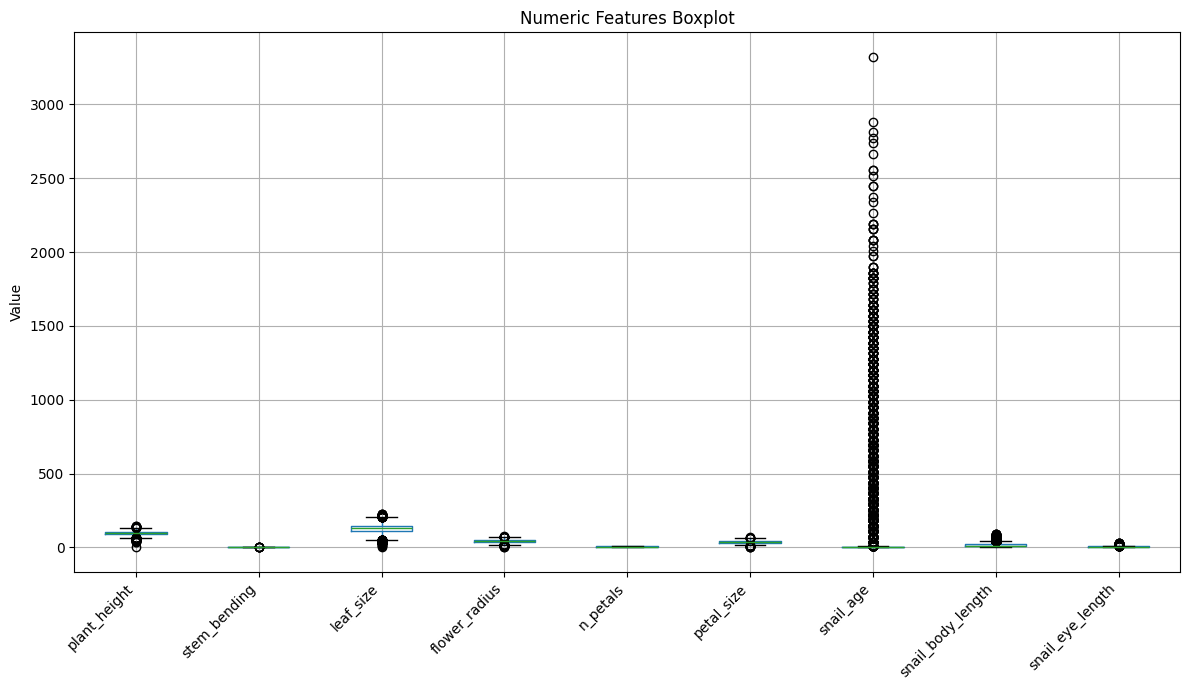

---'Outlier' reikšmės (IQR metodas) ---
Stulpelis 'plant_height': rasta 148 'outlier' reikšmių.
Stulpelis 'stem_bending': rasta 6 'outlier' reikšmių.
Stulpelis 'leaf_size': rasta 130 'outlier' reikšmių.
Stulpelis 'flower_radius': rasta 65 'outlier' reikšmių.
Stulpelis 'n_petals': rasta 0 'outlier' reikšmių.
Stulpelis 'petal_size': rasta 36 'outlier' reikšmių.
Stulpelis 'snail_age': rasta 2386 'outlier' reikšmių.
Stulpelis 'snail_body_length': rasta 577 'outlier' reikšmių.
Stulpelis 'snail_eye_length': rasta 569 'outlier' reikšmių.


In [6]:


print("--- Trūkstamos reikšmės pagal stulpelius ---")

try:
    missing_values = named_df.isnull().sum()
    print(missing_values)
except NameError:
    print("Klaida: 'named_df' kintamasis nerastas. Įsitikinkite, kad Task 2 buvo sėkmingai įvykdytas.")
    named_df = pd.DataFrame()

print("--- Unikalios kategorinių stulpelių reikšmės ---")

if not named_df.empty:
    categorical_cols = named_df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        unique_vals = named_df[col].unique()
        print(f"Stulpelis '{col}': {unique_vals}")
else:
    print("Įspėjimas: DataFrame'as tuščias, unikalios reikšmės nerodomos.")

print("--- Skaitinių stulpelių Boxplot ---")
if not named_df.empty:
    numeric_cols = named_df.select_dtypes(include=[np.number]).columns

    if not list(numeric_cols):
         print("Įspėjimas: Nerasta skaitinių stulpelių, boxplot nebus generuojamas.")
    else:
        plt.figure(figsize=(12, 7))

        named_df.boxplot(column=list(numeric_cols))

        plt.title("Numeric Features Boxplot")
        plt.ylabel("Value")

        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("Klaida: 'named_df' tuščias, grafikas negeneruojamas.")

print("---'Outlier' reikšmės (IQR metodas) ---")
n_outliers_total = 0

if not named_df.empty and 'numeric_cols' in locals() and list(numeric_cols):
    for col in numeric_cols:
        col_data = named_df[col].dropna()

        if col_data.empty:
            print(f"Stulpelis '{col}': tuščias (tik 'nan' reikšmės), 'outlier' reikšmės neskaičiuojamos.")
            continue

        Q1 = col_data.quantile(0.25)
        Q3 = col_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        n_outliers = len(outliers)


        print(f"Stulpelis '{col}': rasta {n_outliers} 'outlier' reikšmių.")

        n_outliers_total += n_outliers

elif named_df.empty:

     print("Klaida: DataFrame'as tuščias, 'outlier' reikšmės neskaičiuojamos.")
else:

     print("Įspėjimas: Nerasta skaitinių stulpelių, 'outlier' reikšmės neskaičiuojamos.")

In [7]:
assert n_outliers_total == 3917

# 🧼 Task 4 (2 points): Clean the data

The `snail_age` column certainly looks strange. Some data cleaning may be needed. After sending the initial analysis to SNAILAB researchers, one of them sent you an email with some additional information:

________________

*Thanks for flagging those issues in the dataset. Let me clarify some things.*

*So the data came from several independent biologists working in different locations, and unfortunately they weren't all using the same units for snail age - some recorded it in years while others used days. You'll need to use a bit of common sense to figure out which is which, keeping in mind that some snails can live up to 10-15 years. For the cleaned dataset, we'd like everything standardized to years.*

*Regarding the missing values, it's a bit nuanced. In some cases, a missing value means someone simply forgot to take that measurement, and we want those samples removed entirely from the analysis. But many missing values are actually meaningful because that measurement was impossible to get - please replace those with an appropriate constant like 0 or "N/A".*

*One more thing about the body measurements: we measured body length from the tip of the snail's tail all the way to the tip of the right eye tentacle. Biologically speaking, the eye tentacles can't be longer than about 40% of the total body length, so if you're seeing values that exceed that, they're definitely measurement errors. We'd like you to replace those incorrect eye length values using 20% of the corresponding body length.*

________________

- (1.2p) According to this new information, get a new DataFrame called `clean_df` which **should not have any missing values** whatsoever. Keep `named_df` unchanged. For any removed or replaced missing values, add a comment with brief explanation why it was done.
- (0.3p) Repair the eye length column.
- (0.4p) Repair the snail age column. Plot two histograms for the snail age data, before and after, side by side. Increase the number of bins in plots for better resolution.
- (0.1p) Repeat the boxplot from Task 3 but with `clean_df`.

*Do not remove or replace outliers, leave them in the data.*


--- Trūkstamų reikšmių tvarkymas ir 'clean_df' kūrimas ---
Pašalinta 38 eilučių dėl trūkstamų pagrindinių matavimų (pvz., 'snail_age').
Trūkstamos gėlių matavimų reikšmės (kur matavimas neįmanomas) pakeistos į 'N/A'.
Bendras trūkstamų reikšmių skaičius 'clean_df': 0

--- Sraigės akies ilgio taisymas ---
Pataisyta 288 'snail_eye_length' reikšmių, kurios viršijo 40% kūno ilgio.

---  Sraigės amžiaus standartizavimas (į metus) ---
Konvertuota 2314 'snail_age' reikšmių iš dienų į metus (naudota riba > 20).
Rodomos 'snail_age' histogramos (prieš ir po valymo):


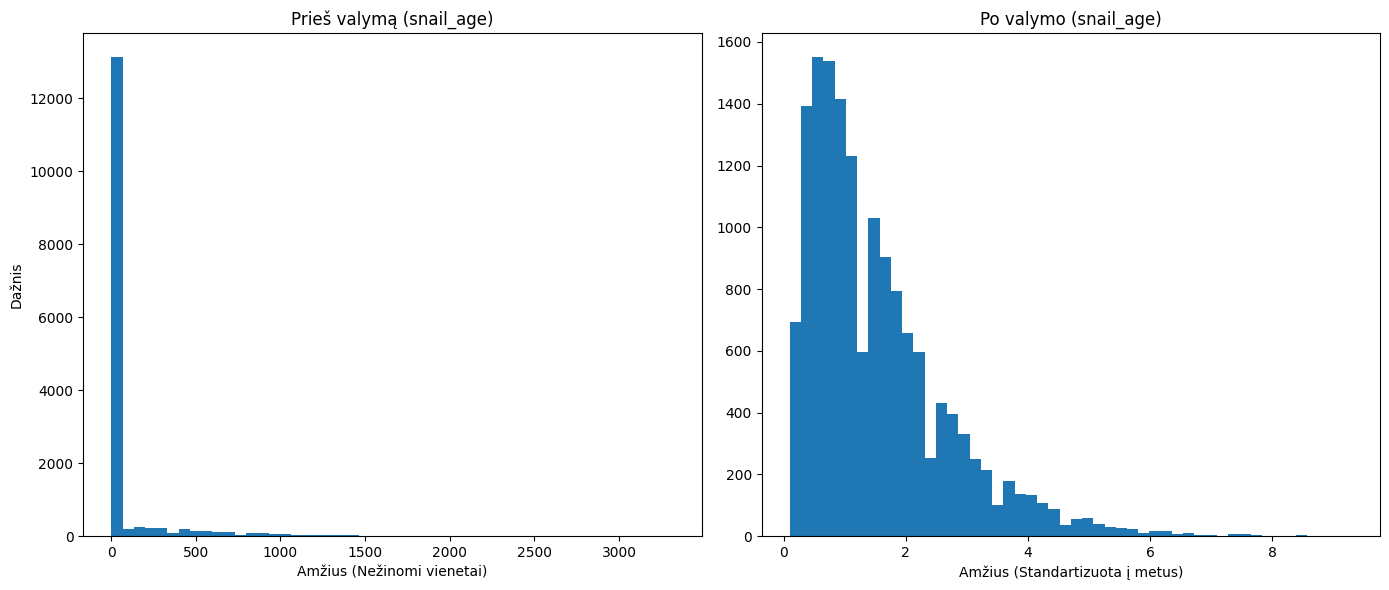


--- Boxplot su išvalytais duomenimis ('clean_df') ---


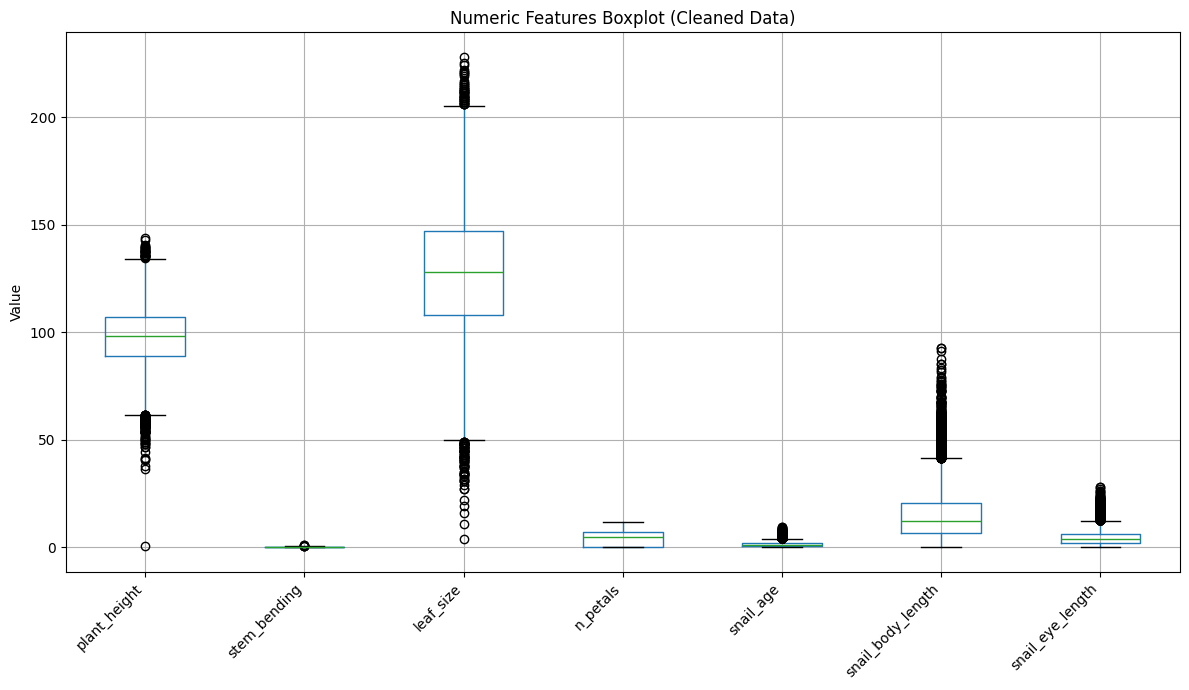

In [8]:

try:
    if 'named_df' not in locals() or named_df.empty:
        print("Klaida: 'named_df' nerastas arba tuščias. Paleiskite Task 2 ir 3.")
        named_df = pd.DataFrame()
except NameError:

    print("Klaida: 'named_df' nerastas. Paleiskite Task 2 ir 3.")
    named_df = pd.DataFrame()

print("\n--- Trūkstamų reikšmių tvarkymas ir 'clean_df' kūrimas ---")
clean_df = named_df.copy()

if not clean_df.empty:
    cols_to_dropna = ['stem_bending', 'leaf_size', 'snail_age',
                      'snail_body_length', 'snail_eye_length']

    rows_before_drop = len(clean_df)
    clean_df = clean_df.dropna(subset=cols_to_dropna)
    rows_after_drop = len(clean_df)

    print(f"Pašalinta {rows_before_drop - rows_after_drop} eilučių dėl trūkstamų pagrindinių matavimų (pvz., 'snail_age').")

    clean_df['flower_radius'] = clean_df['flower_radius'].fillna('N/A')
    clean_df['petal_size'] = clean_df['petal_size'].fillna('N/A')
    clean_df['petal_color'] = clean_df['petal_color'].fillna('N/A')

    print("Trūkstamos gėlių matavimų reikšmės (kur matavimas neįmanomas) pakeistos į 'N/A'.")
    print(f"Bendras trūkstamų reikšmių skaičius 'clean_df': {clean_df.isnull().sum().sum()}")
else:
    print("Klaida: 'clean_df' tuščias, dalis praleidžiama.")

print("\n--- Sraigės akies ilgio taisymas ---")
if not clean_df.empty:
    max_eye_length = 0.4 * clean_df['snail_body_length']
    condition_bad_eye = clean_df['snail_eye_length'] > max_eye_length

    replacement_eye_length = 0.2 * clean_df['snail_body_length']

    n_repaired = condition_bad_eye.sum()

    clean_df['snail_eye_length'] = np.where(
        condition_bad_eye,
        replacement_eye_length,
        clean_df['snail_eye_length']
    )

    print(f"Pataisyta {n_repaired} 'snail_eye_length' reikšmių, kurios viršijo 40% kūno ilgio.")
else:
    print("Klaida (Task 4.2): 'clean_df' tuščias, dalis praleidžiama.")


print("\n---  Sraigės amžiaus standartizavimas (į metus) ---")
if not clean_df.empty:
    age_threshold_years = 20
    condition_is_days = clean_df['snail_age'] > age_threshold_years

    n_converted = condition_is_days.sum()
    clean_df.loc[condition_is_days, 'snail_age'] = clean_df.loc[condition_is_days, 'snail_age'] / 365

    print(f"Konvertuota {n_converted} 'snail_age' reikšmių iš dienų į metus (naudota riba > {age_threshold_years}).")

    print("Rodomos 'snail_age' histogramos (prieš ir po valymo):")
    plt.figure(figsize=(14, 6))

    ax1 = plt.subplot(1, 2, 1)
    ax1.hist(named_df['snail_age'].dropna(), bins=50)
    ax1.set_title("Prieš valymą (snail_age)")
    ax1.set_xlabel("Amžius (Nežinomi vienetai)")
    ax1.set_ylabel("Dažnis")

    ax2 = plt.subplot(1, 2, 2)
    ax2.hist(clean_df['snail_age'], bins=50)
    ax2.set_title("Po valymo (snail_age)")
    ax2.set_xlabel("Amžius (Standartizuota į metus)")

    plt.tight_layout()
    plt.show()

else:
    print("Klaida: 'clean_df' tuščias, dalis praleidžiama.")


print("\n--- Boxplot su išvalytais duomenimis ('clean_df') ---")
if not clean_df.empty:
    numeric_cols_clean = clean_df.select_dtypes(include=[np.number]).columns

    if not list(numeric_cols_clean):

         print("Įspėjimas: Nerasta skaitinių stulpelių 'clean_df', boxplot negeneruojamas.")
    else:
        plt.figure(figsize=(12, 7))

        clean_df.boxplot(column=list(numeric_cols_clean))

        plt.title("Numeric Features Boxplot (Cleaned Data)")
        plt.ylabel("Value")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()
else:
    print("Klaida: 'clean_df' tuščias, dalis praleidžiama.")

In [9]:
assert list(named_df.columns) == list(clean_df.columns)
assert len(named_df) > len(clean_df)

# 🖼️ Task 5 (3 points): Visualize the data

You were asked to create some beautiful EDA plots from `clean_df`. Create 3 plots in total. You will need to save each of them as a PDF image (filenames are provided), as well as output in the Notebook. Make sure everything is readable on the plot, no overlapping parts, cropped/unreadable texts, etc.

1. (1p) **Feature distributions** ("data_features.pdf")
   - A subplot grid (so, at least 2 rows or 2 columns), with as many subplots as there are features (columns) in the data.
   - For each feature, plot either histogram or barplot depending on whether the feature is numeric (continuous/ranked) or categorical. The determination of feature type should be automatic, without manually writing column names as strings anywhere.
   - For each numeric feature, add a red dashed vertical line indicating the average, and a green dashed vertical line for the median.
   - Each histogram should have a title (feature name).
   - Increase bin numbers for better resolution.
   - Color all histograms in a color of your choice.

2. (1p) **Feature correlations** ("data_correlation.pdf")
   - A heatmap showing Spearman's correlation coefficients between all **numeric** features (reminder: you cannot use `seaborn`).
   - The heatmap should have visible values (in [-100%, 100%] range, rounded), correct X and Y ticks (feature names), and a colorbar.
   - Use a diverging colormap and ensure that 0% correlation has the middle color (check `vmin` and `vmax` parameters).
   - The title of the plot should be "Spearman correlation between features".

3. (1p) **Scatterplots of least and most correlated features** ("data_relationships.pdf")
   - Two scatterplots side-by-side, first showing tho least correlated features, second - two most correlated.
   - Least and most correlated features should be found automatically from the correlation matrix calculated for the second plot. Autocorrelation doesn't  count. Keep in mind that -100% is a huge correlation, just negative.
   - Plots should have correctly named X and Y axes.
   - Plot titles should contain Spearman correlation coefficients.
   - Color dots according to the petal colors. Dot colors can be different from the color names used in data, but try to match them (except for the white color, obviously). Make dots smaller and more transparent than default ones.

In [ ]:
import os  # do not delete this import
assert os.path.exists("data_features.pdf")
assert os.path.exists("data_correlation.pdf")
assert os.path.exists("data_relationships.pdf")

*Disclaimer: there is no lab called SNAILAB, and `plantdata.npy` is purely synthetic. Do not use this analysis to learn about snails. The data does not contain any information about the immortal snail. Do not use this analysis to evade the immortal snail. Evading the immortal snail is futile.*